In [4]:

import keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import keras_tuner as kt


keras.datasets.cifar10.load_data()

((array([[[[ 59,  62,  63],
           [ 43,  46,  45],
           [ 50,  48,  43],
           ...,
           [158, 132, 108],
           [152, 125, 102],
           [148, 124, 103]],
  
          [[ 16,  20,  20],
           [  0,   0,   0],
           [ 18,   8,   0],
           ...,
           [123,  88,  55],
           [119,  83,  50],
           [122,  87,  57]],
  
          [[ 25,  24,  21],
           [ 16,   7,   0],
           [ 49,  27,   8],
           ...,
           [118,  84,  50],
           [120,  84,  50],
           [109,  73,  42]],
  
          ...,
  
          [[208, 170,  96],
           [201, 153,  34],
           [198, 161,  26],
           ...,
           [160, 133,  70],
           [ 56,  31,   7],
           [ 53,  34,  20]],
  
          [[180, 139,  96],
           [173, 123,  42],
           [186, 144,  30],
           ...,
           [184, 148,  94],
           [ 97,  62,  34],
           [ 83,  53,  34]],
  
          [[177, 144, 116],
           [16

In [5]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

In [6]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


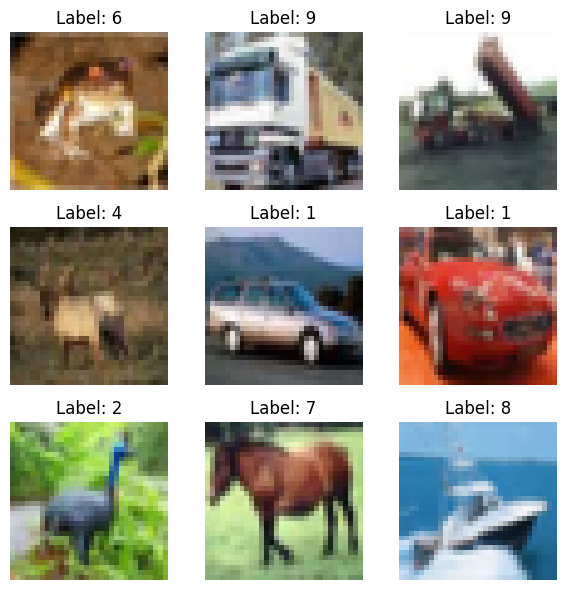

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Show 9 images from x_train with their labels
def plot_cifar10_images(images, labels, num_images=9):
    plt.figure(figsize=(6,6))
    for i in range(num_images):
        plt.subplot(3, 3, i+1)
        plt.imshow(images[i])  # CIFAR images are RGB, no cmap needed
        plt.title(f'Label: {labels[i][0]}')  # labels shape (n,1), so labels[i][0]
        plt.axis('off')
    plt.tight_layout()
    plt.show()

plot_cifar10_images(x_train, y_train)


In [8]:
# Normalize
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

from keras.utils import to_categorical
# One-hot encode
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)



In [9]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu',
                 input_shape=(32, 32, 3), padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

c:\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
batch_size = 64

In [11]:
model.compile(
    optimizer='adam',                      # Adam optimizer is good for most cases
    loss='categorical_crossentropy',       # For multi-class classification
    metrics=['accuracy']                   # To track accuracy during training
)
model.summary()  # Print model summary to check architecture    

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       524,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 525,898 (2.01 MB)

 Trainable params: 525,898 (2.01 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
history = model.fit(
    x_train, y_train,
    steps_per_epoch=len(x_train) // batch_size,
    epochs=10,
    validation_data=(x_test, y_test)
)

Epoch 1/10
769/781 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3088 - loss: 1.9022

c:\Python310\lib\site-packages\keras\src\trainers\epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


781/781 ━━━━━━━━━━━━━━━━━━━━ 15s 18ms/step - accuracy: 0.3103 - loss: 1.8985 - val_accuracy: 0.4994 - val_loss: 1.3805
Epoch 2/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.5183 - loss: 1.3509 - val_accuracy: 0.5478 - val_loss: 1.2732
Epoch 3/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.5687 - loss: 1.2238 - val_accuracy: 0.5566 - val_loss: 1.2343
Epoch 4/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.5997 - loss: 1.1487 - val_accuracy: 0.5772 - val_loss: 1.1938
Epoch 5/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.6191 - loss: 1.0936 - val_accuracy: 0.5973 - val_loss: 1.1435
Epoch 6/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.6384 - loss: 1.0354 - val_accuracy: 0.6068 - val_loss: 1.1084
Epoch 7/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.6495 - loss: 1.0020 - val_accuracy: 0.6240 - val_loss: 1.0755
Epoch 8/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.6665 - loss: 0.9600 - val_accurac

In [13]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Test accuracy: {test_acc:.4f}")
print(f"Test loss: {test_loss:.4f}")
lr = model.optimizer.learning_rate
print(f"Learning rate: {lr.numpy()}")
print(f"Loss function: {model.loss}")



Test accuracy: 0.6212
Test loss: 1.0918
Learning rate: 0.0010000000474974513
Loss function: categorical_crossentropy


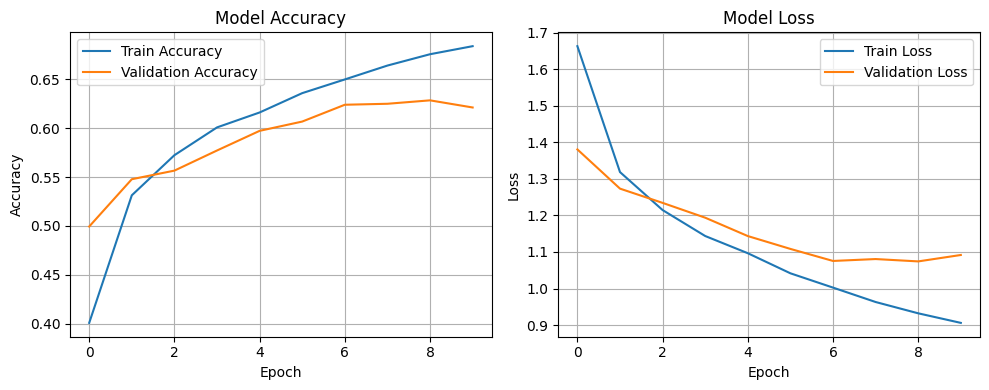

In [14]:
import matplotlib.pyplot as plt

# Accuracy plot
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [34]:
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import RMSprop, Adam

def build_model(hp):
    model = Sequential()
    
    # Conv Layer 1
    model.add(Conv2D(
        filters=hp.Int('conv1_filters', 32, 96, step=32),
        kernel_size=hp.Choice('conv1_kernel', [3, 5]),
        activation='relu',
        padding='same',
        kernel_regularizer=regularizers.l2(0.001),
        input_shape=(32, 32, 3)
    ))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(hp.Float('dropout1', 0.2, 0.4, step=0.1)))
    
    # Conv Layer 2
    model.add(Conv2D(
        filters=hp.Int('conv2_filters', 32, 96, step=32),
        kernel_size=hp.Choice('conv2_kernel', [3, 5]),
        activation='relu',
        padding='same',
        kernel_regularizer=regularizers.l2(0.001)
    ))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(hp.Float('dropout2', 0.2, 0.4, step=0.1)))
    
    model.add(Flatten())
    
    # Dense layer
    model.add(Dense(
        units=hp.Int('dense_units', 64, 192, step=64),
        activation='relu',
        kernel_regularizer=regularizers.l2(0.001)
    ))
    model.add(Dropout(hp.Float('dropout3', 0.3, 0.5, step=0.1)))
    
    # Output layer
    model.add(Dense(10, activation='softmax'))
    
    # Tune optimizer choice
    optimizer_choice = hp.Choice('optimizer', ['adam', 'rmsprop'])
    if optimizer_choice == 'adam':
        optimizer = Adam(learning_rate=hp.Choice('adam_lr', [1e-2, 1e-3, 1e-4]))
    else:
        optimizer = RMSprop(learning_rate=hp.Choice('rms_lr', [1e-2, 1e-3, 1e-4]))
    
    model.compile(
        optimizer=optimizer,
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model


In [37]:
# Set up tuner
tuner = kt.BayesianOptimization(
    build_model,
    objective='val_accuracy',
    max_trials=8,  # Reduced from default to save time
    directory='my_tuner_dir',
    project_name='cifar10_tuning'
)
# Optional early stopping to speed up search
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)



In [38]:
# Run search with your augmented generator
tuner.search(
    x_train, y_train,
    batch_size=batch_size,
    epochs=8,  # Reduced epochs for faster search
    validation_data=(x_test, y_test),
    callbacks=[stop_early],
    verbose=1
)


Trial 8 Complete [00h 08m 07s]
val_accuracy: 0.6556000113487244

Best val_accuracy So Far: 0.6650999784469604
Total elapsed time: 00h 44m 26s


In [39]:

# Get best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print("Best hyperparameters:")
print(f"conv1_filters: {best_hps.get('conv1_filters')}")
print(f"conv1_kernel: {best_hps.get('conv1_kernel')}")
print(f"dropout1: {best_hps.get('dropout1'):.2f}")
print(f"conv2_filters: {best_hps.get('conv2_filters')}")
print(f"conv2_kernel: {best_hps.get('conv2_kernel')}")
print(f"dropout2: {best_hps.get('dropout2'):.2f}")
print(f"dense_units: {best_hps.get('dense_units')}")
print(f"dropout3: {best_hps.get('dropout3'):.2f}")


Best hyperparameters:
conv1_filters: 96
conv1_kernel: 5
dropout1: 0.20
conv2_filters: 96
conv2_kernel: 3
dropout2: 0.40
dense_units: 192
dropout3: 0.50


In [40]:
# Get the best hyperparameters from the tuner
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build the model with the best hyperparameters
best_model = tuner.hypermodel.build(best_hps)

# Print model summary
best_model.summary()

# Train the best model with more epochs (since we used fewer during tuning)
history = best_model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=50,  # Train for more epochs now that we have good parameters
    validation_data=(x_test, y_test),
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5),
        tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3)
    ],
    verbose=1
)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 96)     │         7,296 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 16, 16, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 96)     │        83,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 96)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 8, 8, 96)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 6144)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 192)            │     1,179,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 192)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,930 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,272,106 (4.85 MB)

 Trainable params: 1,272,106 (4.85 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 126s 158ms/step - accuracy: 0.2837 - loss: 2.1360 - val_accuracy: 0.5052 - val_loss: 1.5396 - learning_rate: 0.0010
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 58s 75ms/step - accuracy: 0.4696 - loss: 1.6229 - val_accuracy: 0.5478 - val_loss: 1.4224 - learning_rate: 0.0010
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 54s 68ms/step - accuracy: 0.5088 - loss: 1.5392 - val_accuracy: 0.5836 - val_loss: 1.3730 - learning_rate: 0.0010
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 55s 70ms/step - accuracy: 0.5467 - loss: 1.4686 - val_accuracy: 0.5967 - val_loss: 1.3249 - learning_rate: 0.0010
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 55s 70ms/step - accuracy: 0.5618 - loss: 1.4419 - val_accuracy: 0.6236 - val_loss: 1.3084 - learning_rate: 0.0010
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 55s 70ms/step - accuracy: 0.5813 - loss: 1.3955 - val_accuracy: 0.6525 - val_loss: 1.2169 - learning_rate: 0.0010
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 161s 206ms/step - accuracy: 0.5875

In [43]:
from tensorflow.keras.utils import plot_model
plot_model(best_model, to_file='model.png', show_shapes=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.


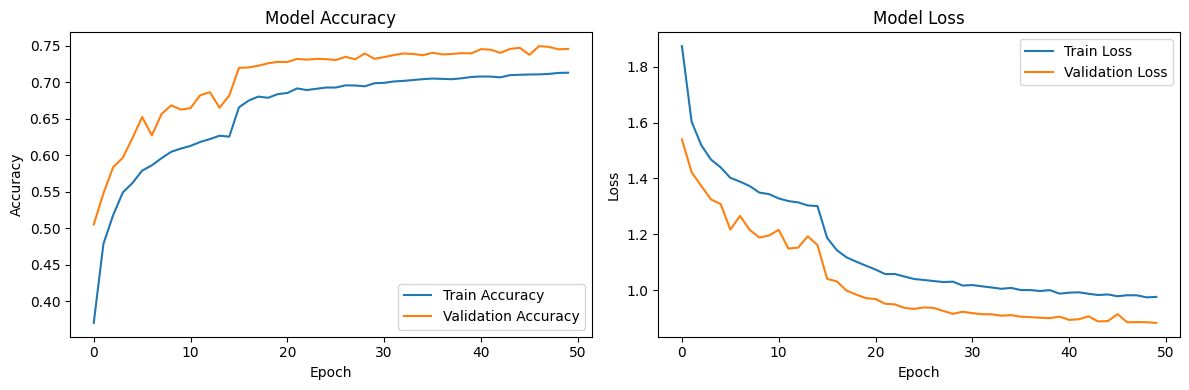

In [44]:
# Plot training history
def plot_history(history):
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

plot_history(history)

In [1]:
## Lecture one
import torch

print("CUDA available:", torch.cuda.is_available())
if torch.cuda.is_available():
    print("GPU:", torch.cuda.get_device_name(0))
    print("CUDA version:", torch.version.cuda)


CUDA available: True
GPU: NVIDIA GeForce RTX 2050
CUDA version: 12.1
